In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("gender_submission.csv")
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


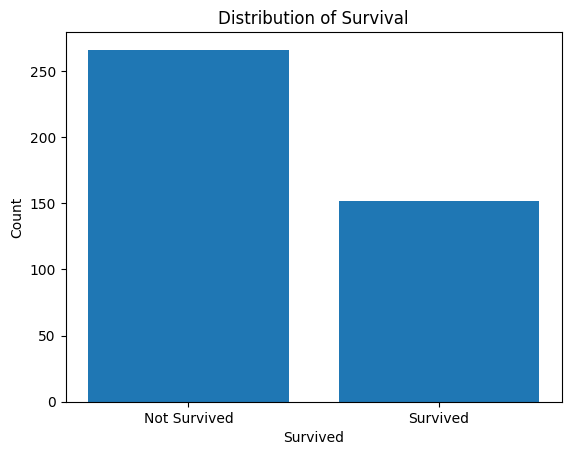

In [4]:
survival_counts = df['Survived'].value_counts()
plt.bar(x=survival_counts.index, height=survival_counts.values)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survival')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

In [5]:
df1=pd.read_csv("train.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


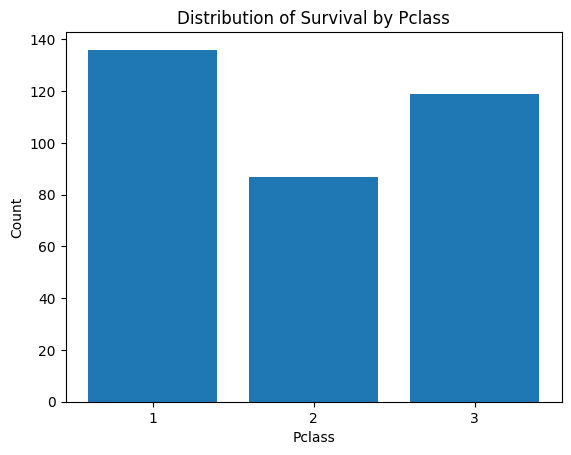

In [7]:
survival_counts = df1[df1['Survived'] == 1]['Pclass'].value_counts().sort_index()
plt.bar(x=survival_counts.index, height=survival_counts.values)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Distribution of Survival by Pclass')
plt.xticks(survival_counts.index)
plt.show()

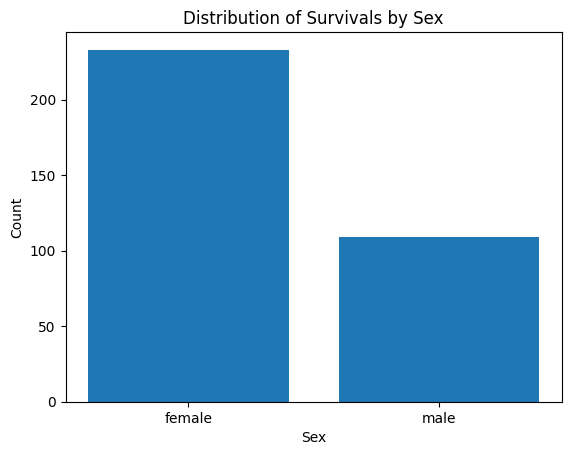

In [10]:
survival_count1=df1[df1['Survived']==1]['Sex'].value_counts()
plt.bar(x=survival_count1.index, height=survival_count1.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Survivals by Sex')
plt.show()

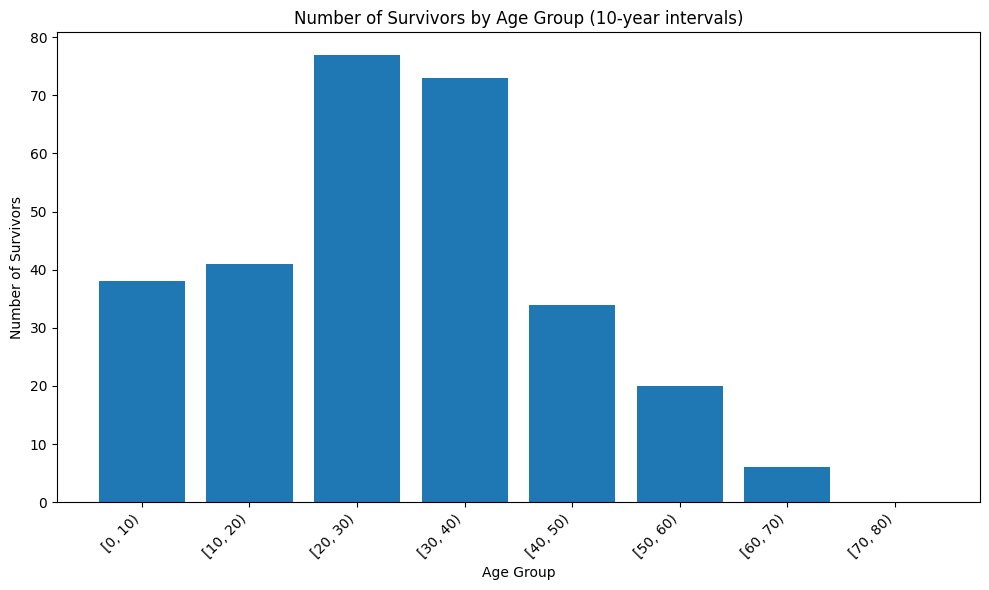

In [11]:
age_bins = range(0, int(df1['Age'].max()) + 10, 10)
df1['AgeGroup'] = pd.cut(df1['Age'], bins=age_bins, right=False)

survived_by_age_group = df1[df1['Survived'] == 1]['AgeGroup'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(x=survived_by_age_group.index.astype(str), height=survived_by_age_group.values)
plt.xlabel('Age Group')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Age Group (10-year intervals)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

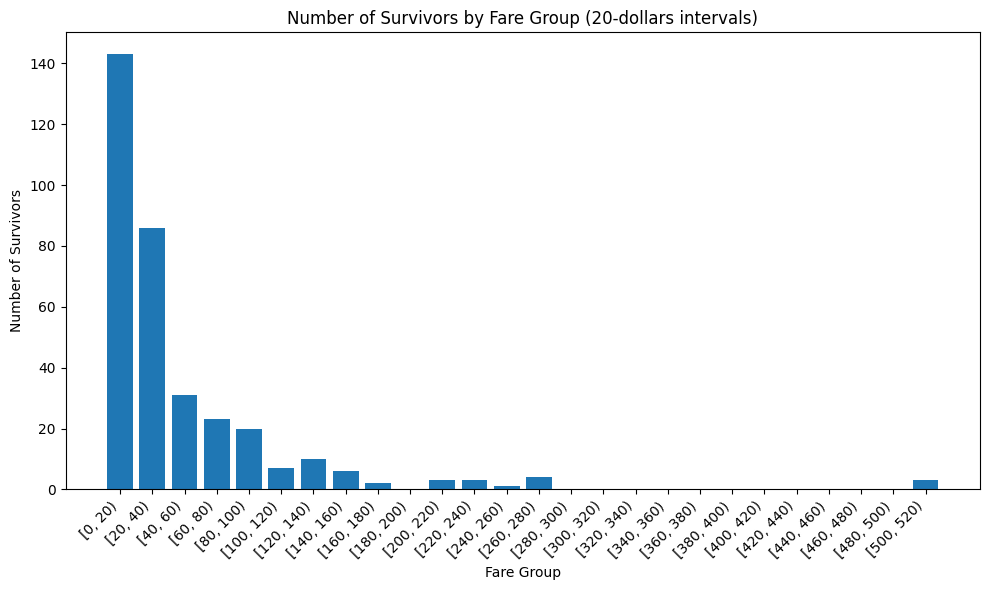

In [16]:
fare_bins=range(int(df1['Fare'].min()), int(df1['Fare'].max())+10, 20)
df1['FareGroup']=pd.cut(df1['Fare'],bins=fare_bins,right=False)
survived_by_fare_group = df1[df1['Survived'] == 1]['FareGroup'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(x=survived_by_fare_group.index.astype(str), height=survived_by_fare_group.values)
plt.xlabel('Fare Group')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Fare Group (20-dollars intervals)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# Drop irrelevant columns
train_df_processed = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_df_processed = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values - Age
train_df_processed['Age'].fillna(train_df_processed['Age'].median(), inplace=True)
test_df_processed['Age'].fillna(test_df_processed['Age'].median(), inplace=True)

# Handle missing values - Fare (only in test_df usually, train.csv has no missing Fare)
test_df_processed['Fare'].fillna(test_df_processed['Fare'].median(), inplace=True)

# Handle missing values - Embarked
train_df_processed['Embarked'].fillna(train_df_processed['Embarked'].mode()[0], inplace=True)
test_df_processed['Embarked'].fillna(test_df_processed['Embarked'].mode()[0], inplace=True)

# Encode categorical features
train_df_processed = pd.get_dummies(train_df_processed, columns=['Sex', 'Embarked'], drop_first=True)
test_df_processed = pd.get_dummies(test_df_processed, columns=['Sex', 'Embarked'], drop_first=True)

# Define X (features) and y (target) for training
y_train = train_df_processed['Survived']
X_train = train_df_processed.drop('Survived', axis=1)

# This ensures both X_train and X_test have the same columns in the same order.
common_cols = list(set(X_train.columns) & set(test_df_processed.columns))
X_train = X_train[common_cols]
X_test = test_df_processed[common_cols]

# Initialize and train the XGBClassifier
model = XGBClassifier(n_estimators=1000, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

print("XGBoost Classifier trained successfully!")

/tmp/ipython-input-2370832990.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_processed['Age'].fillna(train_df_processed['Age'].median(), inplace=True)
/tmp/ipython-input-2370832990.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

XGBoost Classifier trained successfully!


In [19]:
y_pred = model.predict(X_test)

gender_submission = pd.read_csv('gender_submission.csv')
y_true = gender_submission['Survived']

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.7943


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
